# Variable importance for the best amount of code smells prediction model
The XGBoost model is the best model fdor predicting the amount of code smells compared to the others. To understand what variables contribute to predicting the amount of code smells properly, variable importance is used and investigated.

In [1]:
import os
from joblib import dump, load
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb

In [2]:
current_dir = os.getcwd()
model_save_dir = os.path.join(current_dir, '..', '..', 'Data', 'Models', 'CodeSmells')
filename_joblib = os.path.join(model_save_dir, "XGBoost", "XGBoost_tunedParams.joblib")
model = load(filename_joblib)
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.5, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, num_parallel_tree=None, ...)

## Gain
First it is explored what variables contribute to gain a better MAE over the splits in the tree.

In [3]:
importance_df = pd.DataFrame(model.get_booster().get_score(importance_type='gain'),
                             index=['importance']).T
importance_df = importance_df.sort_values('importance', ascending=False)
print("\nImportance DataFrame (gain, sorted):")
print(importance_df)


Importance DataFrame (gain, sorted):
                          importance
COMPLEXITY                253.977325
FUNCTION_COMPLEXITY       107.302780
STATEMENTS                 95.446457
COMMENT_LINES              79.487915
FUNCTIONS                  74.595825
COGNITIVE_COMPLEXITY       73.474411
FILES                      70.649605
NCLOC                      66.377541
PACKAGE                    61.785671
LINES_TO_COVER             61.178875
LINES                      59.505844
UNCOVERED_LINES            56.998695
DUPLICATED_BLOCKS          56.096981
DUPLICATED_FILES           55.571911
DUPLICATED_LINES           48.813438
DUPLICATED_LINES_DENSITY   46.355839
CLASS_COMPLEXITY           36.821354
COMMENT_LINES_DENSITY      36.299500
CLASSES                    33.721878


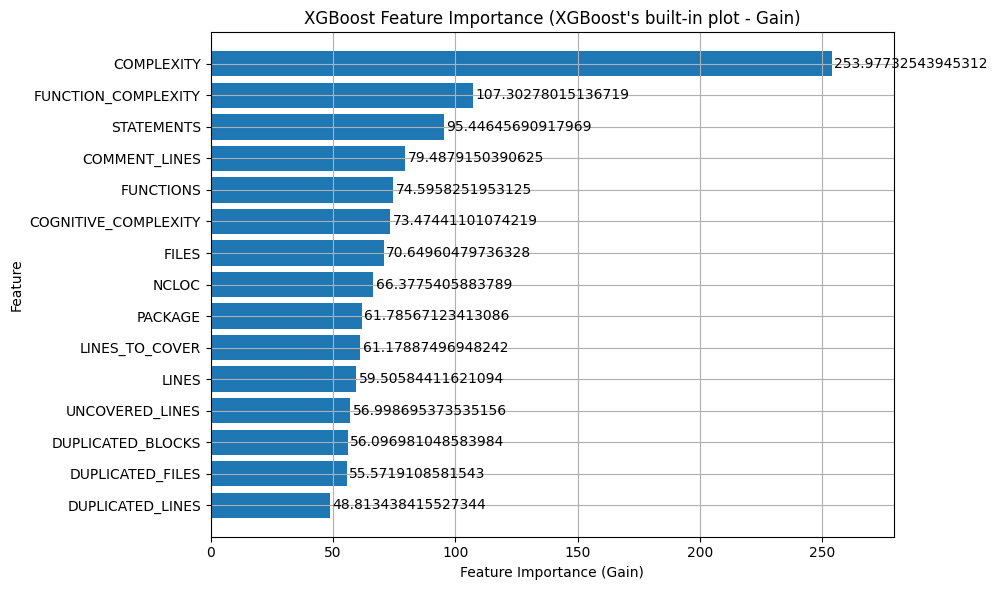

In [4]:
importance_type = 'gain'

fig, ax = plt.subplots(figsize=(10, 6))
xgb.plot_importance(model, ax=ax, importance_type=importance_type,
                    show_values=True, # Show numerical values on bars
                    height=0.8,       # Thickness of bars
                    max_num_features=15 # Limit to top N features if many
                   )
plt.title(f"XGBoost Feature Importance (XGBoost's built-in plot - {importance_type.capitalize()})")
plt.xlabel(f"Feature Importance ({importance_type.capitalize()})")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()